# SADA dataset


intro 

# Exploring the data

intro 

### Load The Dataset 

In [1]:
import pandas as pd

# Load the dataset
file_path = "original data\sada_dataset.csv"  
df = pd.read_csv(file_path)

# Display column names
print("Columns in the dataset:")
print(df.columns)

# Display the first 10 rows
print("\nFirst 10 rows of the dataset:")
print(df.head(10))

Columns in the dataset:
Index(['Unnamed: 0', 'FileName', 'ShowName', 'FullFileLength', 'SegmentID',
       'SegmentLength', 'SegmentStart', 'SegmentEnd', 'SpeakerAge',
       'SpeakerGender', 'SpeakerDialect', 'Speaker', 'Environment',
       'GroundTruthText', 'ProcessedText', 'Category'],
      dtype='object')

First 10 rows of the dataset:
   Unnamed: 0                  FileName           ShowName  FullFileLength  \
0           0  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
1           1  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
2           2  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
3           3  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
4           4  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
5           5  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
6           6  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
7           7  batch_1/6k_SBA_1

### More About The Dataset

In [3]:

# Remove the first index column if it exists (assuming it's unnamed and redundant)
if df.columns[0].startswith("Unnamed"):
    df = df.iloc[:, 1:]

# Count number of rows and columns
num_rows, num_cols = df.shape

# Get column names
column_names = df.columns.tolist()

# Count occurrences of each category
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Count"]

# Count occurrences of each dialect
dialect_counts = df["SpeakerDialect"].value_counts().reset_index()
dialect_counts.columns = ["Dialect", "Count"]

# Print results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"Column names: {column_names}")

print("\nCategory Counts:")
print(category_counts)

print("\nDialect Counts:")
print(dialect_counts)

Number of rows: 253166
Number of columns: 15
Column names: ['FileName', 'ShowName', 'FullFileLength', 'SegmentID', 'SegmentLength', 'SegmentStart', 'SegmentEnd', 'SpeakerAge', 'SpeakerGender', 'SpeakerDialect', 'Speaker', 'Environment', 'GroundTruthText', 'ProcessedText', 'Category']

Category Counts:
        Category  Count
0         كوميدي  71782
1          درامي  52843
2          اطفال  42400
3        مسابقات  39932
4            طبخ  31847
5         تاريخي   5721
6        اجتماعي   3558
7         وثائقي   2262
8   توعوي ارشادي   1635
9          سياحي    871
10        ترفيهي    315

Dialect Counts:
                              Dialect  Count
0                               Najdi  94611
1   More than 1 speaker اكثر من متحدث  52501
2                              Hijazi  36170
3                             Unknown  30867
4                             Khaliji  30320
5                ModernStandardArabic   4302
6                            Egyptian   2172
7                           Leva

### Lets make some visualizations!

Category                           اجتماعي  اطفال  تاريخي  ترفيهي  \
SpeakerDialect                                                      
Egyptian                                38    102       0       2   
Hijazi                                 696  17724      74     206   
Iraqi                                    0      0       0       0   
Janubi                                   0      3       0       0   
Khaliji                                 82   1676    1534       0   
Levantine                                4      5       0       0   
Maghrebi                                 9      0       0       0   
ModernStandardArabic                   207   1493       2       0   
More than 1 speaker اكثر من متحدث      770  12186    1051      52   
Najdi                                 1610   3232    2260      53   
Notapplicable                            0      9       2       0   
Shamali                                  0     29       0       0   
Unknown                           

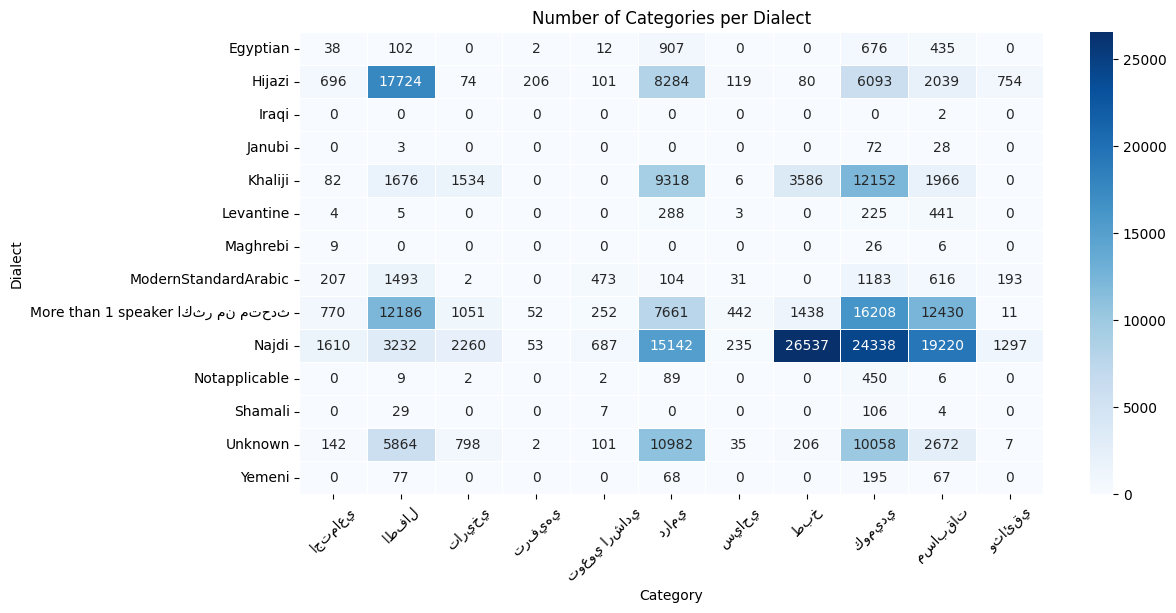

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pivot table to count occurrences of each category per dialect
dialect_category_matrix = df.pivot_table(index="SpeakerDialect", columns="Category", aggfunc="size", fill_value=0)

# Print the matrix
print(dialect_category_matrix)

# Visualize the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dialect_category_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Category")
plt.ylabel("Dialect")
plt.title("Number of Categories per Dialect")
plt.xticks(rotation=45)
plt.show()


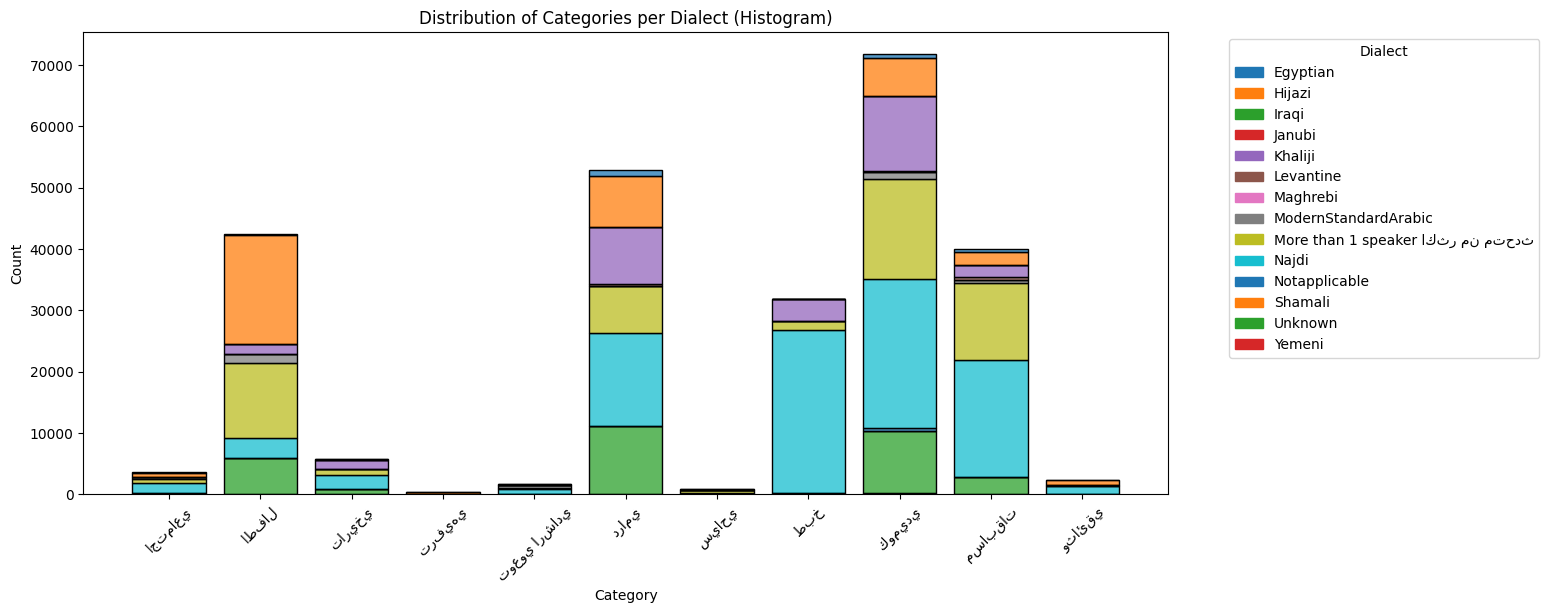

In [5]:
# Create a pivot table to count occurrences of each category per dialect
dialect_category_matrix = df.pivot_table(index="SpeakerDialect", columns="Category", aggfunc="size", fill_value=0)

# Convert the matrix into a long-form DataFrame for histogram plotting
matrix_long = dialect_category_matrix.reset_index().melt(id_vars="SpeakerDialect", var_name="Category", value_name="Count")

# Define a distinct color palette for all dialects
unique_dialects = matrix_long["SpeakerDialect"].unique().tolist()  # Convert to Python list
palette_dict = dict(zip(unique_dialects, sns.color_palette("tab10", len(unique_dialects))))

# Plot a stacked histogram with an explicit legend
plt.figure(figsize=(14, 6))
ax = sns.histplot(data=matrix_long, x="Category", hue="SpeakerDialect", weights="Count",
                  multiple="stack", shrink=0.8, bins=len(dialect_category_matrix.columns), 
                  palette=palette_dict)

# Labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories per Dialect (Histogram)")
plt.xticks(rotation=45)

# Manually create a legend
handles = [plt.Rectangle((0,0),1,1, color=palette_dict[d]) for d in unique_dialects]
plt.legend(handles=handles, labels=[str(d) for d in unique_dialects], title="Dialect", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

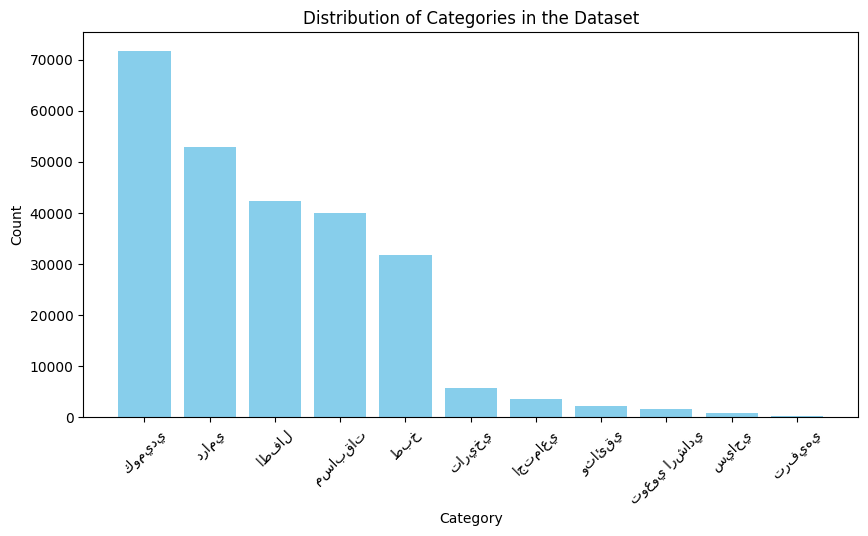

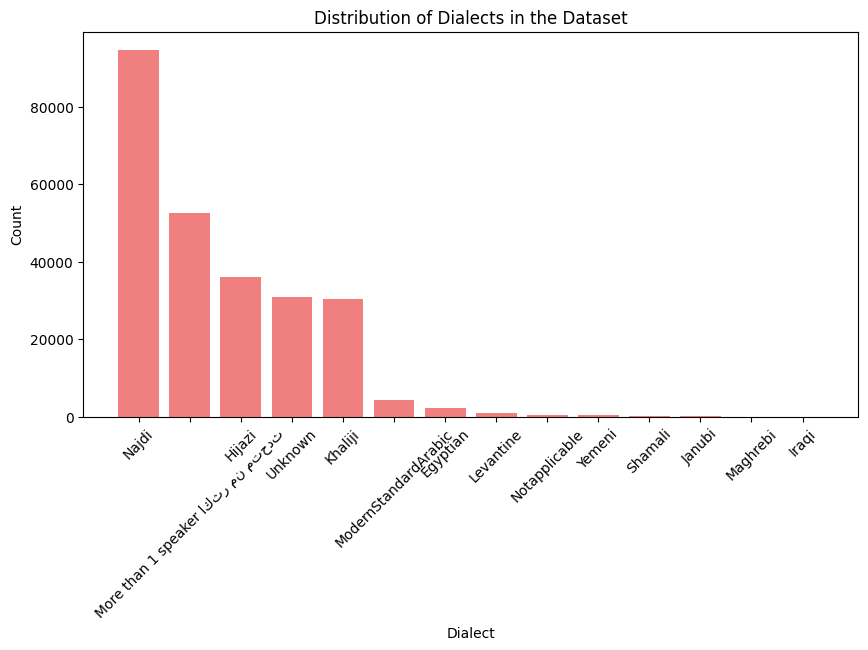

In [6]:
dialect_counts = df["SpeakerDialect"].value_counts().reset_index()
dialect_counts.columns = ["Dialect", "Count"]

# Plot category distribution
plt.figure(figsize=(10, 5))
plt.bar(category_counts["Category"], category_counts["Count"], color='skyblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in the Dataset")
plt.xticks(rotation=45)
plt.show()

# Plot dialect distribution
plt.figure(figsize=(10, 5))
plt.bar(dialect_counts["Dialect"], dialect_counts["Count"], color='lightcoral')
plt.xlabel("Dialect")
plt.ylabel("Count")
plt.title("Distribution of Dialects in the Dataset")
plt.xticks(rotation=45)
plt.show()


# splitting and making the data balanced

mention what colomns we are interested in and mention the dialects and catogreies used and why 

# Trying logistic regression and some preprocessing 

intro 

### Loadig the data 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file
df = pd.read_csv('combined_data.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

  Category                                      ProcessedText SpeakerDialect
0    اطفال                                        وش اخر كلام          Najdi
1    اطفال                    نفس الشي هذا مستحيل مستحيل يحصل        Khaliji
2    اطفال  الشيء اللي اكتشفته في شخصيته انه ما شاء الله ت...          Najdi
3    اطفال                                             عصابات        Khaliji
4    اطفال                   نزلي ايش فيك انت فيك انت ايش انت        Khaliji
45252


### checking the balance!

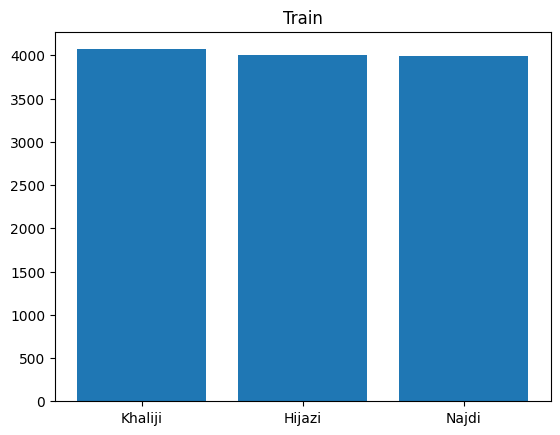

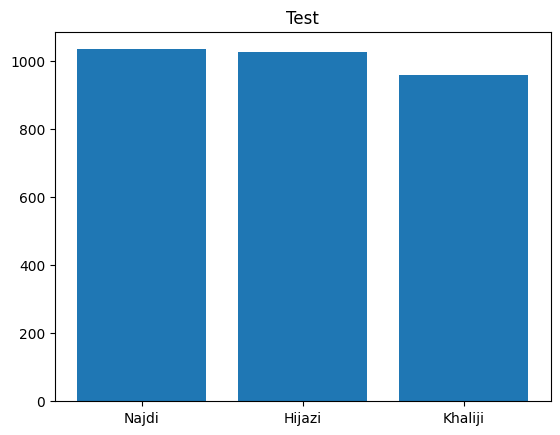

In [8]:
import numpy as np
import matplotlib.pyplot as plt

y_train = np.array(train.SpeakerDialect.value_counts())
x_train = np.array(train.SpeakerDialect.unique())


y_test = np.array(test.SpeakerDialect.value_counts())
x_test = np.array(test.SpeakerDialect.unique())

plt.bar(x_train, y_train, label='Train')
plt.title('Train')
plt.show()

plt.bar(x_test, y_test, label='Test')
plt.title('Test')
plt.show()

### Now lets try our basline model

Initial number of rows in training set: 12067
Initial number of rows in testing set: 3017
Number of rows after removing missing values in training set: 12062
Number of rows after removing missing values in testing set: 3016


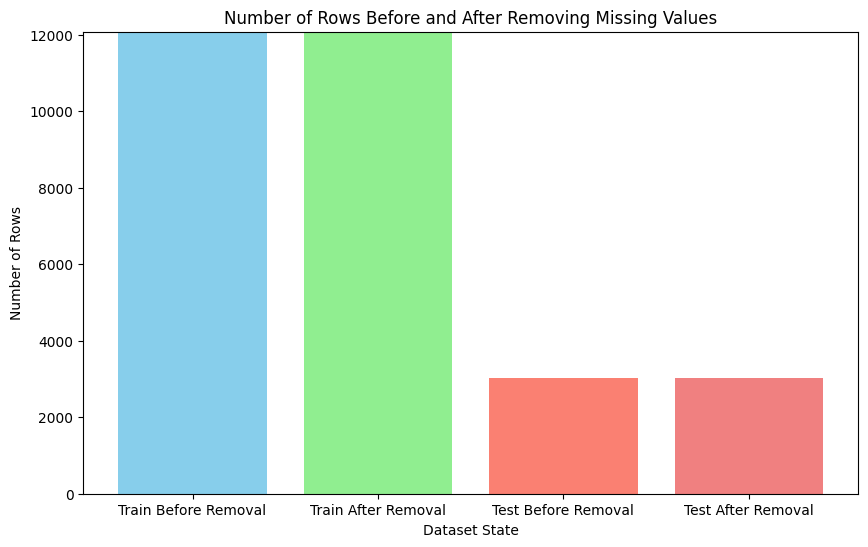

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Display initial number of rows
initial_train_count = len(train)
initial_test_count = len(test)
print(f"Initial number of rows in training set: {initial_train_count}")
print(f"Initial number of rows in testing set: {initial_test_count}")

# Remove rows with missing values in 'ProcessedText' or 'SpeakerDialect'
train_cleaned = train.dropna(subset=['ProcessedText', 'SpeakerDialect'])
test_cleaned = test.dropna(subset=['ProcessedText', 'SpeakerDialect'])

# Display number of rows after removal
final_train_count = len(train_cleaned)
final_test_count = len(test_cleaned)
print(f"Number of rows after removing missing values in training set: {final_train_count}")
print(f"Number of rows after removing missing values in testing set: {final_test_count}")

# Plotting the counts
counts = [initial_train_count, final_train_count, initial_test_count, final_test_count]
labels = ['Train Before Removal', 'Train After Removal', 'Test Before Removal', 'Test After Removal']

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.xlabel('Dataset State')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Before and After Removing Missing Values')
plt.ylim(0, max(counts) + 10)  # Adding some space above the highest bar
plt.show()

In [10]:

# Define features and target
train_x = train_cleaned['ProcessedText']
train_y = train_cleaned['SpeakerDialect']
test_x = test_cleaned['ProcessedText']
test_y = test_cleaned['SpeakerDialect']

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train the model
pipeline.fit(train_x, train_y)

# Test the model
test_preds = pipeline.predict(test_x)

# Evaluate the model
print("Test Accuracy:", accuracy_score(test_y, test_preds))
print("\nClassification Report:\n", classification_report(test_y, test_preds))

Test Accuracy: 0.7503315649867374

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.75      0.72      0.73      1026
     Khaliji       0.74      0.76      0.75       957
       Najdi       0.76      0.77      0.77      1033

    accuracy                           0.75      3016
   macro avg       0.75      0.75      0.75      3016
weighted avg       0.75      0.75      0.75      3016



#### trying to enhance the model

In [11]:
import re
from sklearn.pipeline import Pipeline, FeatureUnion
#  Arabic text cleaner
def clean_arabic_text(text):
    if pd.isnull(text):
        return ""

    # Normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    # Remove diacritics
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)

    # Remove non-Arabic characters, digits, punctuation
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Apply Arabic text cleaning
train_cleaned['ProcessedText'] = train_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)
test_cleaned['ProcessedText'] = test_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)

train_x = train_cleaned['ProcessedText']
train_y = train_cleaned['SpeakerDialect']
test_x = test_cleaned['ProcessedText']
test_y = test_cleaned['SpeakerDialect']
# Combine word and char n-grams
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=3000))
])

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

#  Train model
pipeline.fit(train_x, train_y)

# 🧪 Predict and evaluate
test_preds = pipeline.predict(test_x)

print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))


C:\Users\basha\AppData\Local\Temp\ipykernel_13772\691894236.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['ProcessedText'] = train_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)
C:\Users\basha\AppData\Local\Temp\ipykernel_13772\691894236.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned['ProcessedText'] = test_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)



✅ Test Accuracy: 0.8070291777188329

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.79      0.79      0.79      1026
     Khaliji       0.78      0.81      0.80       957
       Najdi       0.86      0.82      0.84      1033

    accuracy                           0.81      3016
   macro avg       0.81      0.81      0.81      3016
weighted avg       0.81      0.81      0.81      3016



# Trying cross domain

intro

## comedy

intro

### Loading, splitting and checking the balance

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file
df = pd.read_csv('balanced_data_comedy.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

  Category                                      ProcessedText SpeakerDialect
0    اطفال  طيب هو اخ مكار لو الزعيم وافق يعني وراح نشتغل ...        Khaliji
1    اطفال                    ا بس انا انا كيف خرجت من المخزن        Khaliji
2    اطفال  يا منظم يا منظم الحقنا الحقنا الحقنا يا منظم ا...         Hijazi
3    اطفال                       يعني يعني يعني انا ماني فاهم         Hijazi
4    اطفال                                   لون سيارة الوالد          Najdi
15084


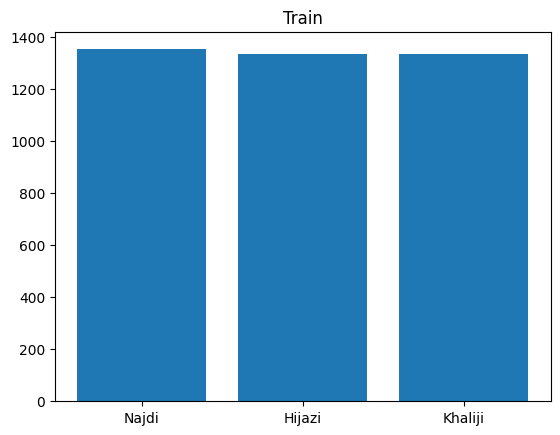

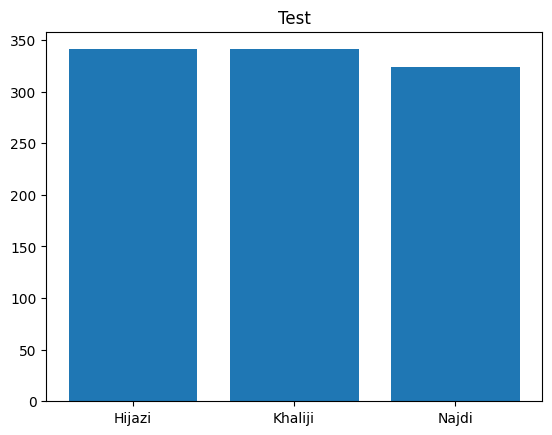

In [13]:
import numpy as np
import matplotlib.pyplot as plt

y_train = np.array(train.SpeakerDialect.value_counts())
x_train = np.array(train.SpeakerDialect.unique())


y_test = np.array(test.SpeakerDialect.value_counts())
x_test = np.array(test.SpeakerDialect.unique())

plt.bar(x_train, y_train, label='Train')
plt.title('Train')
plt.show()

plt.bar(x_test, y_test, label='Test')
plt.title('Test')
plt.show()

In [14]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Arabic text cleaner
def clean_arabic_text(text):
    if pd.isnull(text):
        return ""

    # Normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    # Remove diacritics
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)

    # Remove non-Arabic characters, digits, punctuation
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



# Show initial row counts
print(f"Initial training rows: {len(train)}")
print(f"Initial test rows: {len(test)}")

# Drop rows with missing values
train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# Show counts after cleaning
print(f"After cleaning training rows: {len(train)}")
print(f"After cleaning test rows: {len(test)}")


# Apply Arabic text cleaning
train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)

# Define features and labels
train_x = train['ProcessedText']
train_y = train['SpeakerDialect']
test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

# Combine word and char n-grams
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=3000))
])

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train model
pipeline.fit(train_x, train_y)

# Predict and evaluate
test_preds = pipeline.predict(test_x)

print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))


Initial training rows: 4022
Initial test rows: 1006
After cleaning training rows: 4020
After cleaning test rows: 1006

✅ Test Accuracy: 0.49105367793240556

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.43      0.44      0.43       341
     Khaliji       0.48      0.44      0.46       324
       Najdi       0.56      0.59      0.58       341

    accuracy                           0.49      1006
   macro avg       0.49      0.49      0.49      1006
weighted avg       0.49      0.49      0.49      1006



## kids

intro

### Loading, splitting and checking the balance

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file
df = pd.read_csv('balanced_data_kid.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

  Category                                      ProcessedText SpeakerDialect
0    اطفال  طيب هو اخ مكار لو الزعيم وافق يعني وراح نشتغل ...        Khaliji
1    اطفال                    ا بس انا انا كيف خرجت من المخزن        Khaliji
2    اطفال  يا منظم يا منظم الحقنا الحقنا الحقنا يا منظم ا...         Hijazi
3    اطفال                       يعني يعني يعني انا ماني فاهم         Hijazi
4    اطفال                                   لون سيارة الوالد          Najdi
15084


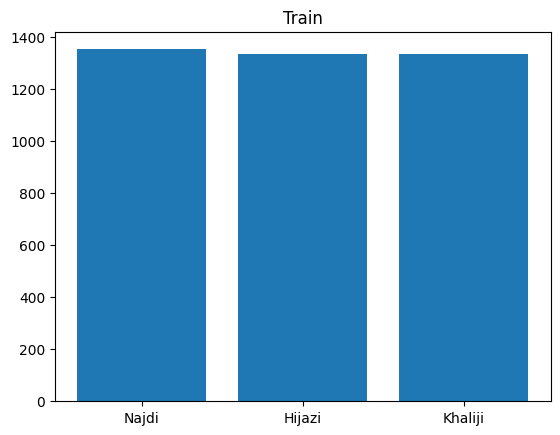

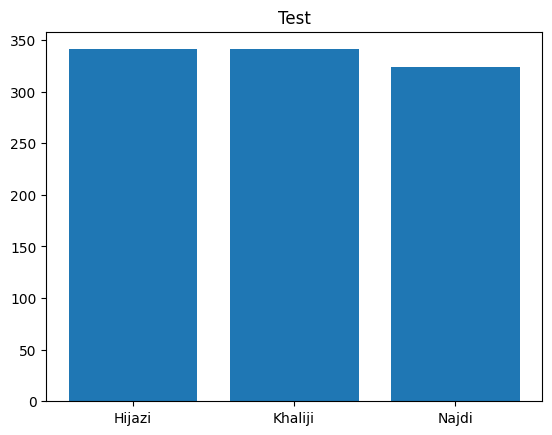

In [16]:
import numpy as np
import matplotlib.pyplot as plt

y_train = np.array(train.SpeakerDialect.value_counts())
x_train = np.array(train.SpeakerDialect.unique())


y_test = np.array(test.SpeakerDialect.value_counts())
x_test = np.array(test.SpeakerDialect.unique())

plt.bar(x_train, y_train, label='Train')
plt.title('Train')
plt.show()

plt.bar(x_test, y_test, label='Test')
plt.title('Test')
plt.show()

In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Arabic text cleaner
def clean_arabic_text(text):
    if pd.isnull(text):
        return ""

    # Normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    # Remove diacritics
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)

    # Remove non-Arabic characters, digits, punctuation
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



# Show initial row counts
print(f"Initial training rows: {len(train)}")
print(f"Initial test rows: {len(test)}")

# Drop rows with missing values
train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# Show counts after cleaning
print(f"After cleaning training rows: {len(train)}")
print(f"After cleaning test rows: {len(test)}")


# Apply Arabic text cleaning
train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)

# Define features and labels
train_x = train['ProcessedText']
train_y = train['SpeakerDialect']
test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

# Combine word and char n-grams
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=3000))
])

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train model
pipeline.fit(train_x, train_y)

# Predict and evaluate
test_preds = pipeline.predict(test_x)

print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))


Initial training rows: 4022
Initial test rows: 1006
After cleaning training rows: 4020
After cleaning test rows: 1006

✅ Test Accuracy: 0.49105367793240556

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.43      0.44      0.43       341
     Khaliji       0.48      0.44      0.46       324
       Najdi       0.56      0.59      0.58       341

    accuracy                           0.49      1006
   macro avg       0.49      0.49      0.49      1006
weighted avg       0.49      0.49      0.49      1006



## drama

intro

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file
df = pd.read_csv('balanced_data_drama.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Arabic text cleaner
def clean_arabic_text(text):
    if pd.isnull(text):
        return ""

    # Normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    # Remove diacritics
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)

    # Remove non-Arabic characters, digits, punctuation
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



# Show initial row counts
print(f"Initial training rows: {len(train)}")
print(f"Initial test rows: {len(test)}")

# Drop rows with missing values
train.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
test.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# Show counts after cleaning
print(f"After cleaning training rows: {len(train)}")
print(f"After cleaning test rows: {len(test)}")


# Apply Arabic text cleaning
train['ProcessedText'] = train['ProcessedText'].astype(str).apply(clean_arabic_text)
test['ProcessedText'] = test['ProcessedText'].astype(str).apply(clean_arabic_text)

# Define features and labels
train_x = train['ProcessedText']
train_y = train['SpeakerDialect']
test_x = test['ProcessedText']
test_y = test['SpeakerDialect']

# Combine word and char n-grams
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
    ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=3000))
])

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train model
pipeline.fit(train_x, train_y)

# Predict and evaluate
test_preds = pipeline.predict(test_x)

print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))


  Category                                      ProcessedText SpeakerDialect
0    اطفال  طيب هو اخ مكار لو الزعيم وافق يعني وراح نشتغل ...        Khaliji
1    اطفال                    ا بس انا انا كيف خرجت من المخزن        Khaliji
2    اطفال  يا منظم يا منظم الحقنا الحقنا الحقنا يا منظم ا...         Hijazi
3    اطفال                       يعني يعني يعني انا ماني فاهم         Hijazi
4    اطفال                                   لون سيارة الوالد          Najdi
15084
Initial training rows: 4022
Initial test rows: 1006
After cleaning training rows: 4020
After cleaning test rows: 1006

✅ Test Accuracy: 0.49105367793240556

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.43      0.44      0.43       341
     Khaliji       0.48      0.44      0.46       324
       Najdi       0.56      0.59      0.58       341

    accuracy                           0.49      1006
   macro avg       0.49      0.49      0.49      1006
weighted avg       0.49